In [63]:
import tensorflow as tf
import keras
keras.__version__

'2.8.0'

# A first look at a neural network

This notebook is inspired from the code samples found in Chapter 2, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures..

----

We will now take a look at a first concrete example of a neural network, which makes use of the Python library Keras to learn to classify 
hand-written digits. 

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 
categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been 
around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test 
images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST 
as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine 
learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

## 1 - Load Data
----

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays.

Documentation : https://keras.io/datasets/#mnist-database-of-handwritten-digits

In [64]:
# Q1.1 : Load the mnist dataset

from keras.datasets import mnist

# YOUR CODE BELOW
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [65]:
# Test
assert(len(x_train) == 60000)
assert(len(x_test) == 10000)

`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [66]:
# Q1.2 : What is the train_images shape ?

# YOUR CODE BELOW
x_train.shape

(60000, 28, 28)

Let's have a look at the test data:

In [67]:
# Q1.3 : What is the test_images shape ?

# YOUR CODE BELOW
x_test.shape

(10000, 28, 28)

Our workflow will be as follow: first we will present our neural network with the training data, `train_images` and `train_labels`. The 
network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for `test_images`, and we 
will verify if these predictions match the labels from `test_labels`.

Let's build our network -- again, remember that you aren't supposed to understand everything about this example just yet.

# Printing the five first images of our training sample

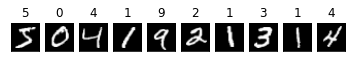

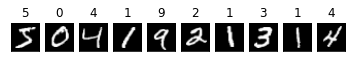

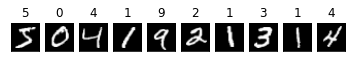

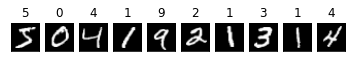

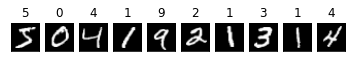

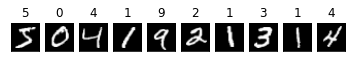

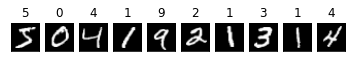

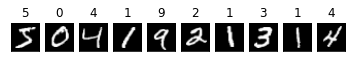

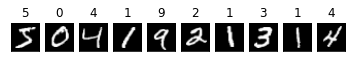

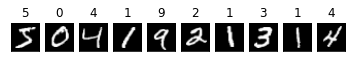

In [68]:
from matplotlib import pyplot
for j in range(10):
  for i in range(10):
    pyplot.subplot(1,10,1+i)
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
    pyplot.title(str(y_train[i]))
    pyplot.xticks([])
    pyplot.yticks([])
  pyplot.show()

## 2 - Building our Network
----

### Create the building blocks

> Our first Neural Network will contain the following building blocks : 
- Dense Layer : 512 neurons, relu activation, input shape (28*28, )
- Dense Layer : 10 neurons, softmax activation

Let's create the network by using the `Sequential` API of Keras

Documentation : https://keras.io/getting-started/sequential-model-guide/

In [69]:
# Q2.1 : Create the layers of the neural network using the Sequential API from Keras

from keras import models
from keras import layers

# YOUR CODE BELOW
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(512, input_shape=(28*28,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 activation_2 (Activation)   (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# nombre de parametre à la 1ere couche (28*28+1)*512

401920

Call the `summary` method of the network to see what's inside.

In [70]:
# Q2.2 : Show the network's summary

# YOUR CODE BELOW
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 activation_2 (Activation)   (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


> You should see a total of 407 050 parameters for your network 


The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. Some 
data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully 
representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple layers 
which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a 
succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each 
score will be the probability that the current digit image belongs to one of our 10 digit classes.

### Compile the network

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified).

The exact purpose of the loss function and the optimizer will be made clear later on.

You will implement the following compilation step for your Neural Network : 
- "rmsprop" optimizer
- "categorical_crossentropy" loss
- metric : "accuracy"

Documentation : https://keras.io/getting-started/sequential-model-guide/#compilation

In [71]:
# Q2.2 : Add the compilation step to the network

# YOUR CODE BELOW
# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 3 - Data preparation before training
----

### Reshape and cast train and test sets

Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in the `[0, 1]` interval. 

Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

Same for the test images, which contain 10000 images.

> Hint : You can apply the `reshape` and `astype` functions from numpy directly on the arrays

In [72]:
# Q3.1 : Reshape and cast the training set
# YOUR CODE BELOW
import numpy as np

train_images = x_train.reshape(60000, 28*28).astype(np.float) / 255
train_images.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


(60000, 784)

In [31]:
# Test
assert(train_images.dtype == "float")
assert(int(100 * train_images.mean()) == 13)

In [32]:
train_images.mean()

0.1306604762738429

In [73]:
# Q3.2 : Reshape and cast the test set
# YOUR CODE BELOW
test_images = x_test.reshape(10000, 28*28).astype(np.float) / 255
test_images.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


(10000, 784)

In [34]:
# Test
assert(test_images.dtype == "float")
assert(int(100 * test_images.mean()) == 13)

### Encode the labels

Ecode the labels using the `to_categorical` function from Keras.

Documentation : https://keras.io/utils/#to_categorical

In [74]:
# Q3.3 : encode the labels from train and test sets

from tensorflow.keras.utils import to_categorical

# YOUR CODE BELOW
train_y = to_categorical(y_train, num_classes=10)
test_y = to_categorical(y_test, num_classes=10)

In [75]:
train_y.shape

(60000, 10)

In [37]:
# Test
#assert(y_train.shape == (60000, 10))
#assert(y_test.shape == (10000, 10))

## 4 - Training the network
----

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

You will fit the network with the following configurations :
- 5 epochs (passes on the whole dataset)
- batchs of 128 images

Documentation : https://keras.io/models/sequential/#fit

In [76]:
# Q4.1 : Fit the neural network to its training data

# YOUR CODE BELOW
model.fit(x=train_images, y=train_y, batch_size=32, epochs=5, workers=3, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2045 - accuracy: 0.9395
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0914 - accuracy: 0.9735
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0665 - accuracy: 0.9811
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0528 - accuracy: 0.9852
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0426 - accuracy: 0.9886


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data.

## 5 - Evaluate performances on test set
----

Now let's check that our model performs well on the test set too.

You can do this by calling the `evaluate` method of your network.

Documentation : https://keras.io/models/sequential/#evaluate

In [46]:
# Q5.1 : Evaluate the network's performances on the test data

# YOUR CODE BELOW
test_loss, test_acc = model.evaluate(test_images, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.1182 - accuracy: 0.9790


In [47]:
print('test_acc:', test_acc)

test_acc: 0.9789999723434448


# printing the five first images of our testing dataset

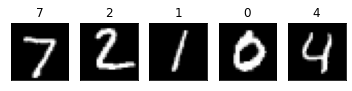

In [113]:
from matplotlib import pyplot
#for j in range(10):
for i in range(5):
    pyplot.subplot(1,5,1+i)
    pyplot.imshow(test_images[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    pyplot.title(str(y_test[i]))
    pyplot.xticks([])
    pyplot.yticks([])
pyplot.show()

# Printing a new image from the testing dataset which as be predicted

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 

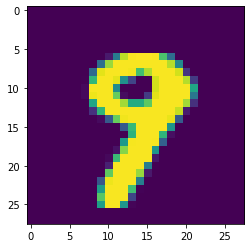

In [115]:
%matplotlib inline
import pylab as plt

rdn = np.random.choice(range(10000))
vfunc = np.vectorize(round)
print(vfunc(test_images[rdn]).reshape((28, 28)).astype(int))
print('Valeur du label prédit', str(y_test[rdn]))
plt.imshow(test_images[rdn].reshape(28, 28))
#plt.plot(range(10), model.predict(test_images[rdn:rdn+1]).reshape(10))

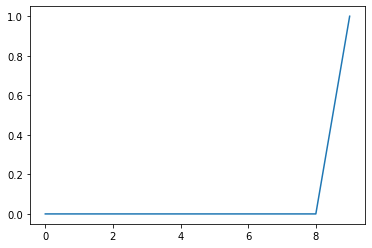

In [116]:
plt.plot(range(10), model.predict(test_images[rdn:rdn+1]).reshape(10))

In [ ]:
y_test[rdn]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])


Our test set accuracy turns out to be 97.8% -- that's quite a bit lower than the training set accuracy. 
This gap between training accuracy and test accuracy is an example of "overfitting", 
the fact that machine learning models tend to perform worse on new data than on their training data.

This concludes our very first example -- you just saw how we could build and a train a neural network to classify handwritten digits, in less than 20 lines of Python code. 

We will now go in detail over every moving piece we just previewed, and clarify what is really going on behind the scenes. You will learn about "tensors", the data-storing objects going into the network, about tensor operations, which 
layers are made of, and about gradient descent, which allows our network to learn from its training examples.

## 6 - Bonus
----

Let's compare the performances of this simple neural network to other traditional Machine Learning algorithms.

You can use any model you want from the scikit-learn library (which needs to be installed).

For example, for a logistic regression (one of the simplest and most used Machine Learning algorithm) : 
- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- http://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html#sphx-glr-auto-examples-exercises-plot-digits-classification-exercise-py